In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('visits.csv', sep='\t')
data.head(3)


,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк


In [2]:
stat = pd.pivot_table(data, index=['name'], values='time_spent', aggfunc='mean')
stat.head(3)

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042


In [3]:
total_visits = data['name'].count()
total_visits

317104

In [4]:
total_stations = len(data['id'].unique())
total_stations

471

In [5]:
print(data['date_time'].min(),data['date_time'].max())

20180402T000008 20180408T235957


In [6]:
total_days = 7
station_visits_per_day = total_visits / total_stations/total_days
station_visits_per_day

96.17955717318775

In [7]:
data['name'].value_counts().head()

name
Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Name: count, dtype: int64

<Axes: >

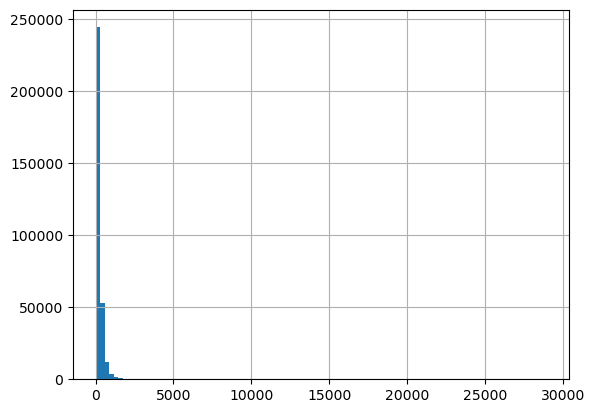

In [8]:
data['time_spent'].hist(bins=100)

##### <span style="color: #00eedd;">Бросаем кубики.</span>

[13, 10, 9, 7, 8, 2, 8, 12, 5, 10, 6, 8, 5, 6, 5, 8, 7, 8, 13, 7, 5, 6, 5, 9, 8, 4, 4, 7, 11, 8, 5, 14, 12, 10, 7, 7, 6, 11, 14, 10, 5, 7, 6, 6, 5, 2, 6, 7, 8, 11, 9, 10, 10, 10, 4, 10, 5, 11, 9, 11, 7, 9, 7, 2, 7, 5, 13, 14, 3, 13, 13, 6, 6, 7, 8, 12, 10, 9, 9, 7, 12, 10, 8, 9, 13, 8, 13, 12, 8, 7, 10, 9, 8, 9, 8, 6, 3, 11, 11, 10, 8, 6, 11, 4, 11, 9, 7, 9, 4, 11, 8, 8, 10, 5, 5, 10, 3, 13, 8, 12, 12, 5, 10, 5, 10, 14, 10, 11, 14, 7, 12, 7, 12, 11, 5, 6, 4, 8, 6, 8, 6, 9, 5, 11, 6, 9, 9, 8, 5, 7]


array([[<Axes: title={'center': '0'}>]], dtype=object)

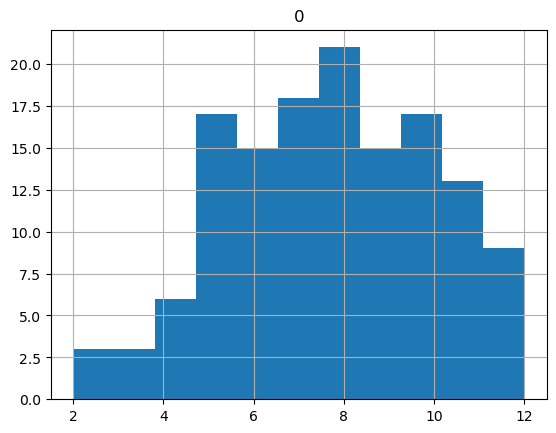

In [9]:
import random as r
count_list=[]
for i in range(150):
    s = r.randint(1,7)
    p = r.randint(1,7)
    score = s+p
    count_list.append(score)
print(count_list)

df = pd.DataFrame(count_list)
df.hist(bins=11, range=(2,12))



<Axes: >

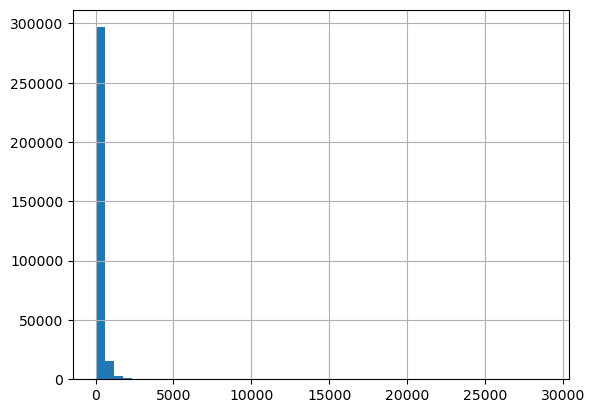

In [10]:
data['time_spent'].hist(bins=50)

(-100.0, 1000.0)

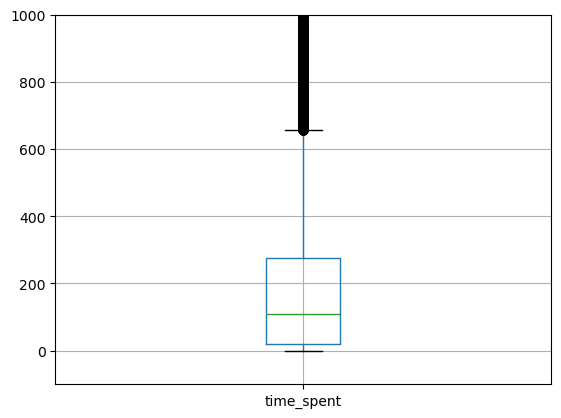

In [11]:

data.boxplot('time_spent')
plt.ylim(-100, 1000)

In [12]:
data.head(2)

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк


In [13]:
print(data.describe().round(2))

       time_spent
count   317104.00
mean       203.38
std        395.75
min          0.00
25%         19.00
50%        108.00
75%        274.00
max      28925.00


---

<Axes: >

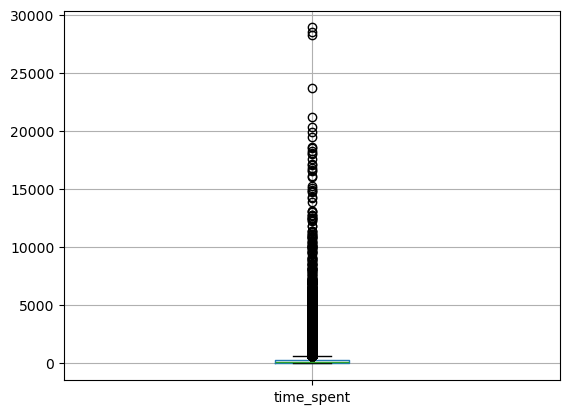

In [14]:
data.boxplot('time_spent')

##### <span style="color: #00eedd;">Выбираем id заправки с аномальными показателями: 3c1e4c52 </span> 
Не только эта заправка имеет аномальные показатели, но она встречается чаще всего в выборке. Поэтому есть смысл начать с нее.

Сортировка датафрейма по time_spent и занесение в переменную

In [15]:
sample = data.sort_values(by='time_spent', ascending=False).head(3)
sample

,date_time,id,time_spent,name
114797,20180402T055708,3c1e4c52,28925.0,Василёк
27147,20180406T080254,4b5f2af5,28519.0,Немезия
60547,20180408T000002,cf1ba8a5,28292.0,Василёк


##### <span style="color: #00eedd;">Найдем id с максимальным суммарным временем.</span>

Сводная по id с суммированием времени по каждому и сортировкой по времени.

In [16]:
sc = pd.pivot_table(data,index='id', values='time_spent', aggfunc='sum').sort_values(by='time_spent', ascending=False)
sc.head(3)


,time_spent
id,
3c1e4c52,3326693.0
470b30f9,1721530.0
09f693b3,1442159.0


##### <span style="color: #00eedd;">Строим график на основе выборки 'data' и 'sample' </span>

Выводим два графика. Перывый – берем данные из data. Второй – берем данные из переменной sample

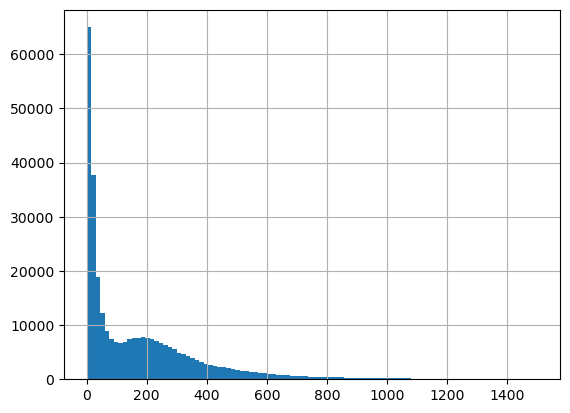

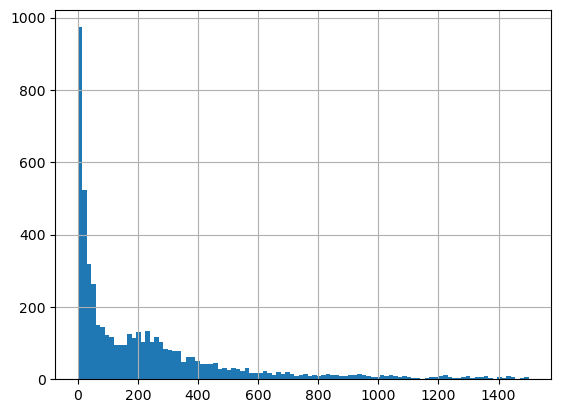

In [17]:
sample = data.query('id == "3c1e4c52"')
data['time_spent'].hist(bins=100, range=(0,1500))
plt.show()
sample['time_spent'].hist(bins=100, range=(0,1500))
plt.show()    


In [18]:
data.head(2)

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк


Преобразование даты

In [19]:
data['date_time'] = pd.to_datetime(
    data['date_time'], format = '%Y%m%dT%H%M%S'
)
print(data.head(2))

            date_time        id  time_spent     name
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк


Создаем новую колонку, корректируем часовой пояс – прибавляем 3 часа

In [20]:
data['local_time'] = data['date_time'] + pd.Timedelta(hours = +3)
print(data.head(2))

            date_time        id  time_spent     name          local_time
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк 2018-04-04 20:39:13


Округляем время до часов

In [21]:
data['date_hour'] = data['local_time'].dt.round('1H')
data.head(2)

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00


Строим график с точками

<Axes: xlabel='local_time'>

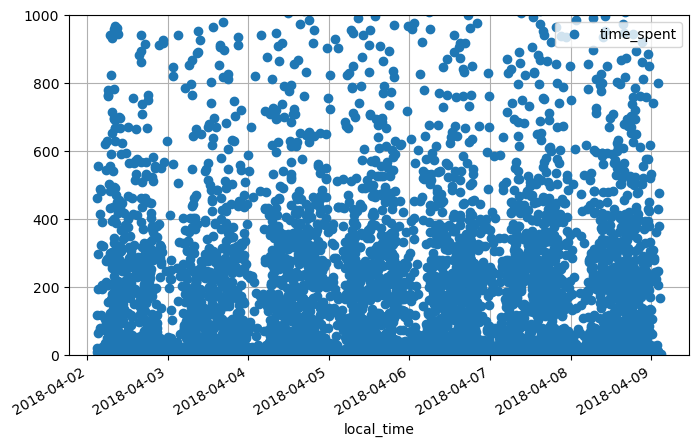

In [22]:
sample = data.query('id == "3c1e4c52"')
sample.plot(x='local_time', y='time_spent', style='o', ylim=(0,1000), grid=True, figsize=(8,5))


График с крестиками

<Axes: xlabel='local_time'>

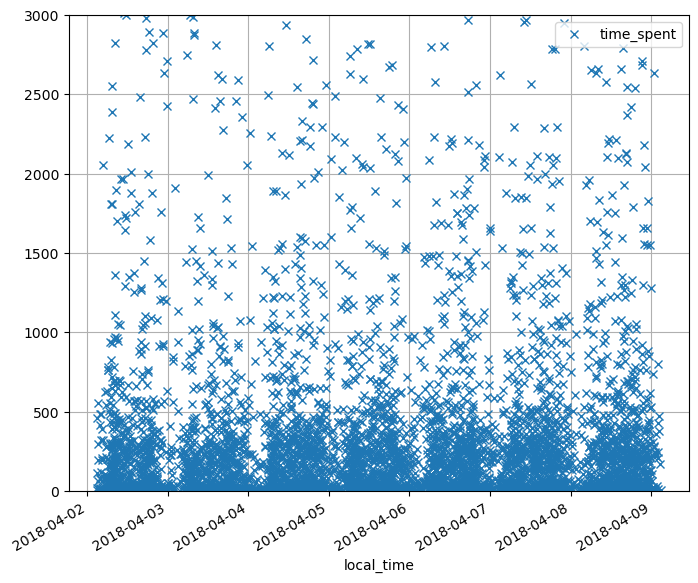

In [23]:
data.query('id == "3c1e4c52"').plot(x='local_time', y='time_spent', style='x', ylim=(0,3000), grid=True, figsize=(8,7))
#plt.show()

In [24]:
data.head(2)


,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00


Посмотрим на среднюю продолжительность заправки в час. Обратимся к pivot_table(). Добавим сводную таблицу в цепочку между query() и plot(). Также возьмем более правдоподобные значения до 1000 мин.:

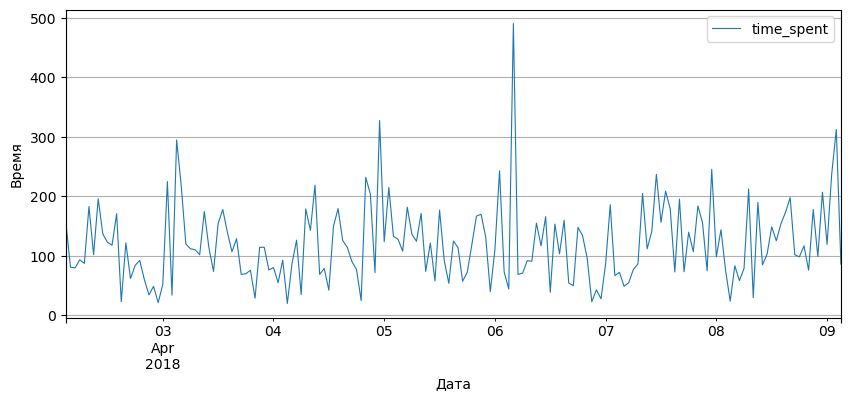

In [25]:
(data
    .query('id == "3c1e4c52" and time_spent <1000')
    .pivot_table(index='date_hour', values='time_spent', aggfunc='median')
    .plot(grid=True, linewidth=0.8, figsize=(10,4))
)

plt.ylabel('Время')
plt.xlabel('Дата')


plt.show()

----------------------------------

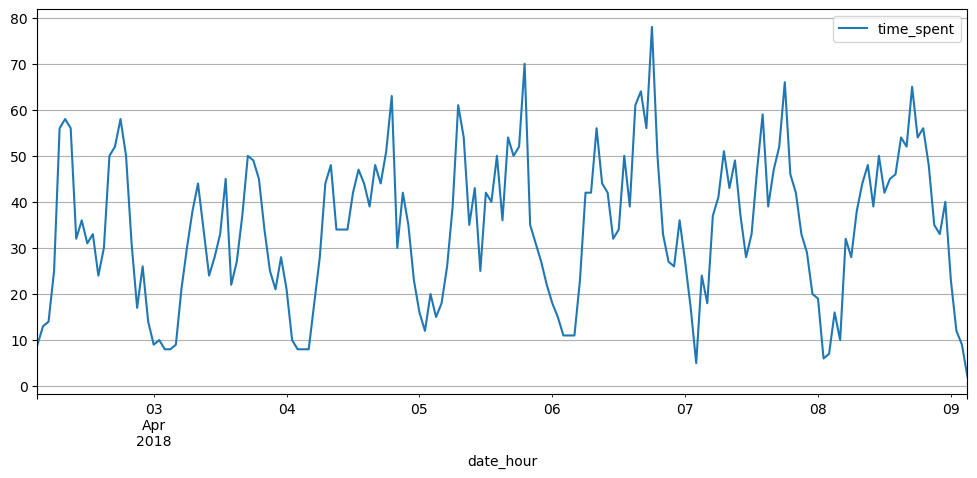

In [26]:
(
    data
    .query('id=="3c1e4c52"')
    .pivot_table(index='date_hour', values='time_spent', aggfunc='count')
    .plot(grid=True, figsize=(12,5))
)
plt.show()


Считаем процент аномально коротких заездов на каждой заправке.
Вычисляем по условию: <60==(True), >60==(False), и делим количество True на общее количество строк.
data['too_fast'].mean() – считает среднее для каждой заправки, но здесь выводит среднее всего столбца, потому что обращение к столбцу.

In [27]:
data['too_fast'] = data['time_spent']<60
data['too_fast'].mean()


0.42213910893586964

Здесь рассматриваем среднее уже по каждой заправке.

In [28]:
too_fast_stat = data.pivot_table(index='id', values='too_fast', aggfunc='mean')
print(too_fast_stat.head(2))

          too_fast
id                
00ca1b70  0.250000
011f7462  0.637489


Строим график на основании сводной таблицы. По x: процент аномально коротких заездов. По y: процент заправок. Т.е. есть заправки, где все 100% заездов аномально короткие.

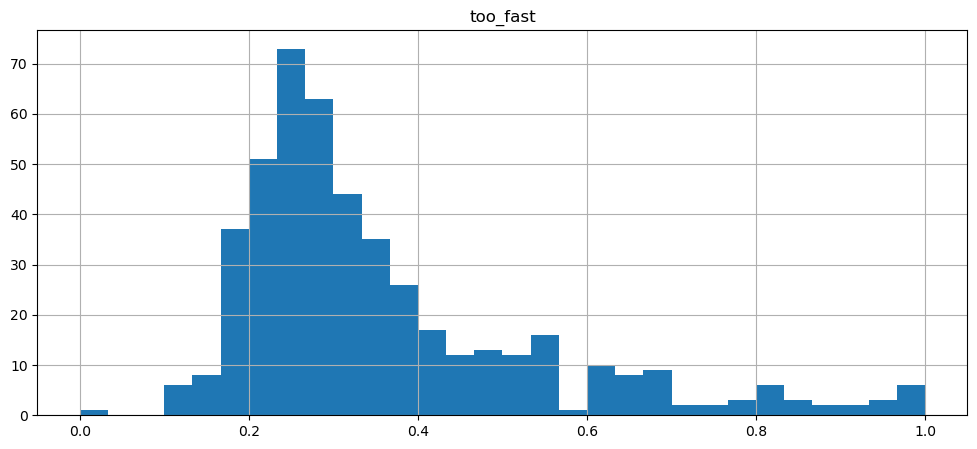

In [29]:
too_fast_stat.hist(bins=30, grid=True, figsize=(12,5))

plt.show()

Заездов >1000.сек : 6186
Заездов <60.сек : 133862


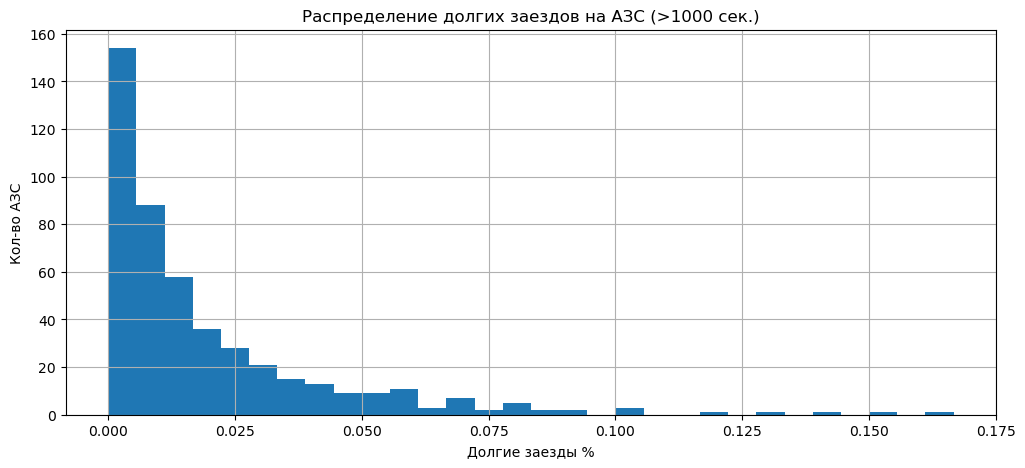

In [30]:
data['too_slow'] = data['time_spent']>1000

too_slow_stat = data.pivot_table(index='id', values='too_slow').hist(bins=30, grid=True, figsize=(12,5))

plt.title('Распределение долгих заездов на АЗС (>1000 сек.)')
plt.xlabel('Долгие заезды %')
plt.ylabel('Кол-во АЗС')

long = data[data['too_slow']==True]['too_slow'].count()
short = data[data['too_fast']==True]['too_fast'].count()

print('Заездов >1000.сек :', long)
print('Заездов <60.сек :', short)